<a href="https://colab.research.google.com/github/Tusharedith/Video-analytics/blob/main/cv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

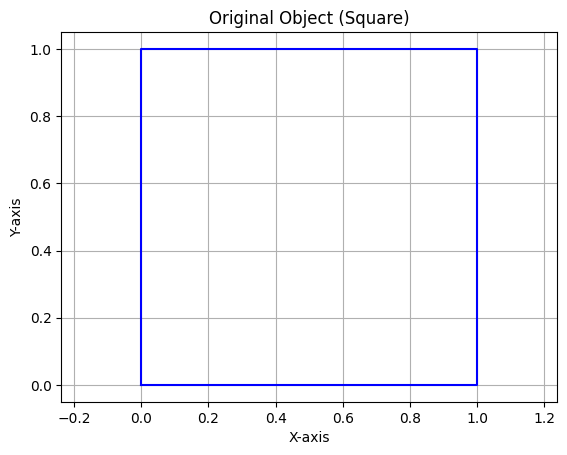

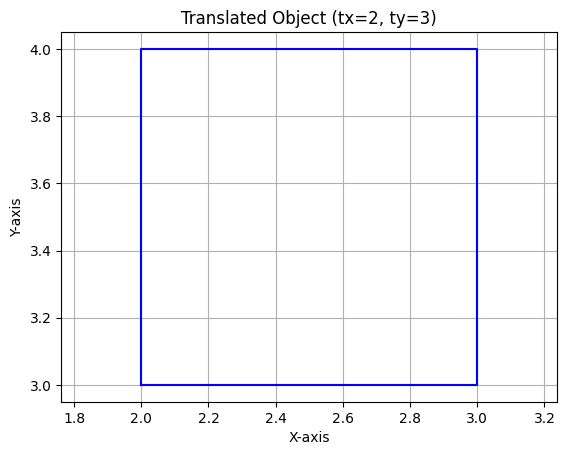

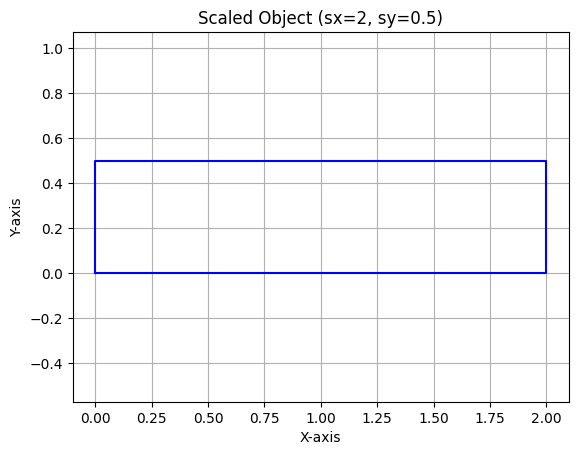

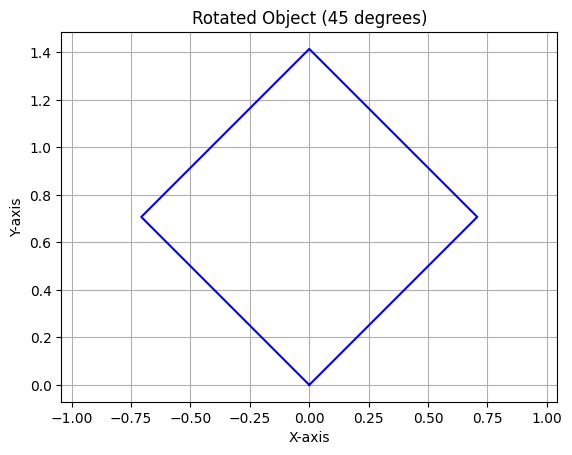

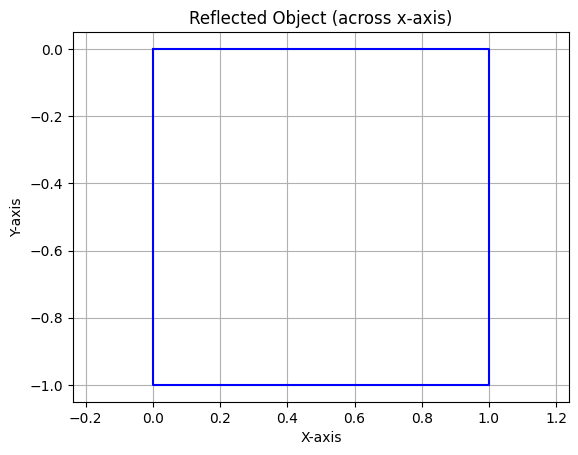

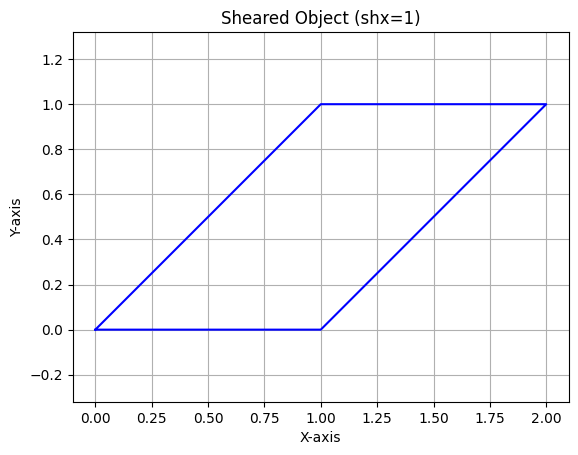

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D object: A square (example)
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])  # 4 vertices and back to the start

def plot_object(obj, title, color='blue'):
    """Plot a 2D object."""
    plt.figure()
    plt.plot(obj[:, 0], obj[:, 1], color=color)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.axis('equal')
    plt.show()

def translate(obj, tx, ty):
    """Translate a 2D object."""
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, translation_matrix.T)
    return transformed[:, :2]

def scale(obj, sx, sy):
    """Scale a 2D object."""
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, scaling_matrix.T)
    return transformed[:, :2]

def rotate(obj, theta):
    """Rotate a 2D object by theta degrees."""
    theta_rad = np.radians(theta)
    rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad), 0],
                                 [np.sin(theta_rad),  np.cos(theta_rad), 0],
                                 [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, rotation_matrix.T)
    return transformed[:, :2]

def reflect(obj, axis):
    """Reflect a 2D object across x-axis or y-axis."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, reflection_matrix.T)
    return transformed[:, :2]

def shear(obj, shx, shy):
    """Shear a 2D object."""
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    obj_homogeneous = np.hstack((obj, np.ones((obj.shape[0], 1))))  # Convert to homogeneous coordinates
    transformed = np.dot(obj_homogeneous, shearing_matrix.T)
    return transformed[:, :2]

# Demonstrate the transformations
plot_object(square, "Original Object (Square)")

# Translation
translated_square = translate(square, 2, 3)
plot_object(translated_square, "Translated Object (tx=2, ty=3)")

# Scaling
scaled_square = scale(square, 2, 0.5)
plot_object(scaled_square, "Scaled Object (sx=2, sy=0.5)")

# Rotation
rotated_square = rotate(square, 45)
plot_object(rotated_square, "Rotated Object (45 degrees)")

# Reflection
reflected_square = reflect(square, 'x')
plot_object(reflected_square, "Reflected Object (across x-axis)")

# Shearing
sheared_square = shear(square, 1, 0)
plot_object(sheared_square, "Sheared Object (shx=1)")


In [2]:
! pip install opencv-python
! pip install matplotlib


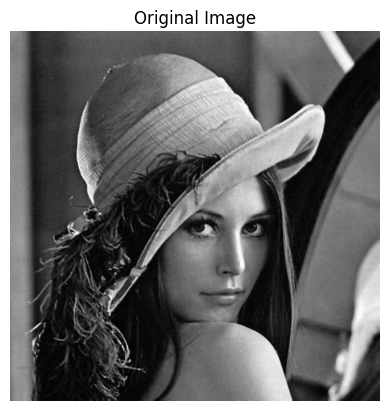

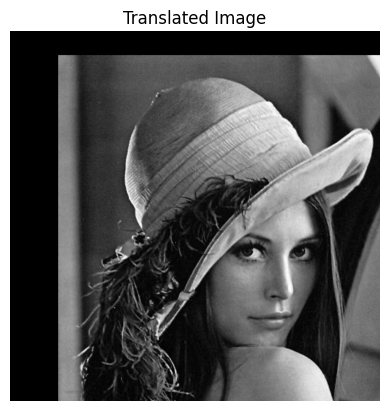

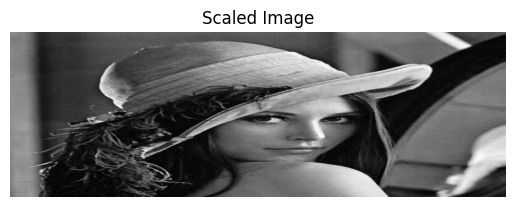

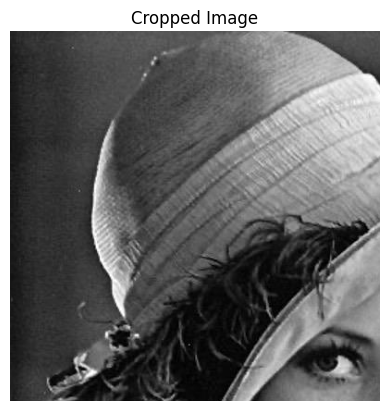

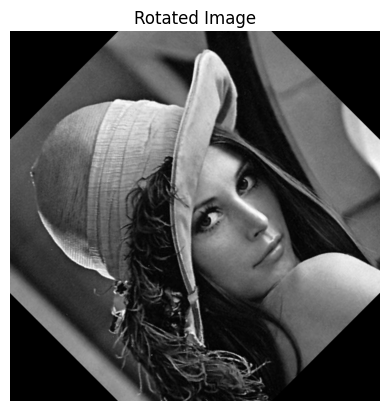

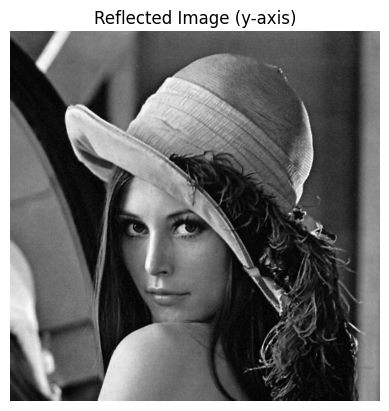

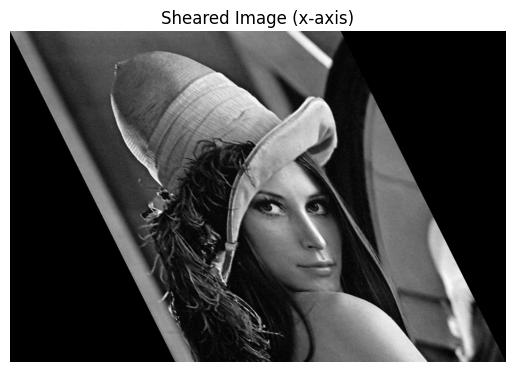

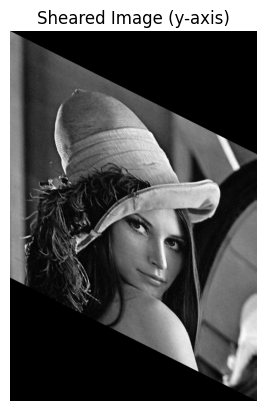

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(img, title):
    """Display an image."""
    plt.figure()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image, "Original Image")

# Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))
    return translated_img

translated_img = translate_image(image, 100, 50)
show_image(translated_img, "Translated Image")

# Scaling
def scale_image(img, fx, fy):
    scaled_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_img

scaled_img = scale_image(image, 1.5, 0.5)
show_image(scaled_img, "Scaled Image")

# 5. Cropping
def crop(img, x_start, y_start, width, height):
    return img[y_start:y_start+height, x_start:x_start+width]

cropped = crop(image, 50, 50, 400, 400)
show_image(cropped, "Cropped Image")

# Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img

rotated_img = rotate_image(image, 45)
show_image(rotated_img, "Rotated Image")

# Reflection
def reflect_image(img, axis):
    if axis == 'x':
        reflected_img = cv2.flip(img, 0)
    elif axis == 'y':
        reflected_img = cv2.flip(img, 1)
    return reflected_img

reflected_img = reflect_image(image, 'y')
show_image(reflected_img, "Reflected Image (y-axis)")

# Shearing
def shear_image(img, shx, shy):
    rows, cols = img.shape[:2]
    shearing_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    sheared_img = cv2.warpAffine(img, shearing_matrix, (cols + int(shx * rows), rows + int(shy * cols)))
    return sheared_img

sheared_img_x = shear_image(image, 0.5, 0)
show_image(sheared_img_x, "Sheared Image (x-axis)")

sheared_img_y = shear_image(image, 0, 0.5)
show_image(sheared_img_y, "Sheared Image (y-axis)")
